In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer,Dense,Dropout

In [2]:
data=pd.read_csv("/content/sample_data/thyroidDF.csv")

In [3]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [4]:
data.shape

(9172, 31)

In [5]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [6]:
data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','referral_source','patient_id'],axis=1,inplace=True)


In [7]:
diagnoses={'A':'hyperthyroid conditions',
 'B':'hyperthyroid conditions',
'C':'hyperthyroid conditions',
'D':'hyperthyroid conditions',
'E':'hypothyroid conditions',
'F':'hypothyroid conditions',
'G':'hypothyroid conditions',
'H':'hypothyroid conditions',
'I':'binding protein',
'J':'binding protein',
'K':'general health',
'L':'replacement therapy',
'M':'replacement therapy',
'N':'replacement therapy',
'O':'antithyroid treatment',
'P':'antithyroid treatment',
'Q':'antithyroid treatment',
'R':'miscellaneous',
'S':'miscellaneous',
'T':'miscellaneous',}
data['target']=data['target'].map(diagnoses)


In [8]:
data.dropna(subset=['target'],inplace=True)

In [9]:
data['target'].value_counts()

hypothyroid conditions     593
general health             436
binding protein            376
replacement therapy        336
miscellaneous              281
hyperthyroid conditions    182
antithyroid treatment       33
Name: target, dtype: int64

In [10]:
data=data[data.age<=100]

In [11]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [12]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0
18,63,F,t,f,f,t,f,f,f,f,...,f,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN
32,41,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN
33,71,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN
39,55,F,t,f,f,f,f,f,f,t,...,f,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN
9157,60,M,f,f,t,f,f,f,f,f,...,f,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN
9158,64,M,f,f,f,f,f,f,f,t,...,f,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN
9162,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN


In [13]:
x['sex'].replace(np.nan,'F',inplace=True)

In [14]:
x.fillna(0,inplace=True)

In [15]:
x['sex'].value_counts()

F    1701
M     536
Name: sex, dtype: int64

In [16]:
x['age']=x['age'].astype('float')
x['TSH']=x['TSH'].astype('float')
x['T3']=x['T3'].astype('float')
x['TT4']=x['TT4'].astype('float')
x['T4U']=x['T4U'].astype('float')
x['FTI']=x['FTI'].astype('float')
x['TBG']=x['TBG'].astype('float')



In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   float64
 1   sex                  2237 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   o

In [18]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
ordinal_encoder=OrdinalEncoder(dtype='int64')
x.iloc[:, 1:16]=ordinal_encoder.fit_transform(x.iloc[:, 1:16])

<ipython-input-18-9e6cb4c2e35b>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:, 1:16]=ordinal_encoder.fit_transform(x.iloc[:, 1:16])


In [19]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.0,0.0,0.00,0.0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,0.0,48.0,1.02,47.0,0.0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,0.0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,0.0,126.0,1.38,91.0,0.0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.810000,0.0,31.0,0.55,56.0,0.0
9157,60.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.180000,0.0,28.0,0.87,32.0,0.0
9158,64.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0.000000,0.0,44.0,0.53,83.0,0.0
9162,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.0,84.0,1.26,67.0,0.0


In [20]:
x.replace(np.nan,'0',inplace=True)

In [21]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.0,0.0,0.00,0.0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,0.0,48.0,1.02,47.0,0.0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,0.0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,0.0,126.0,1.38,91.0,0.0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.810000,0.0,31.0,0.55,56.0,0.0
9157,60.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.180000,0.0,28.0,0.87,32.0,0.0
9158,64.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0.000000,0.0,44.0,0.53,83.0,0.0
9162,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.0,84.0,1.26,67.0,0.0


In [22]:

label_encoder=LabelEncoder()
y_dt=label_encoder.fit_transform(y)

In [23]:
y=pd.DataFrame(y_dt, columns=['target'])

In [24]:
y

,target
0,5
1,4
2,5
3,1
4,6
...,...
2232,2
2233,2
2234,1
2235,1


In [25]:
x=x.astype('float')
y=y.astype('float')

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
y_train.value_counts()

target
4.0       471
2.0       351
1.0       302
6.0       265
5.0       230
3.0       144
0.0        26
dtype: int64

In [29]:
os = SMOTE(random_state=0,k_neighbors=1)
x_bal,y_bal=os.fit_resample(x_train,y_train)
x_test_bal,y_test_bal=os.fit_resample(x_test,y_test)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)
x_test_bal=sc.transform(x_test_bal)

In [31]:
x_bal

array([[-1.62721505, -0.55176257, -0.44547421, ..., -2.50870684,
        -1.40088079,  3.29445097],
       [-0.11561403, -0.55176257,  2.30310072, ..., -0.26259147,
         0.0720981 , -0.19494049],
       [ 1.1874903 ,  2.0173423 , -0.44547421, ...,  0.17039463,
        -0.19352104, -0.19494049],
       ...,
       [ 1.395987  , -0.55176257,  2.30310072, ...,  0.43615031,
         0.06101022, -0.19494049],
       [ 0.72802783,  1.54146103,  2.30310072, ...,  0.143333  ,
         0.89086631, -0.19494049],
       [ 1.15628145, -0.55176257,  2.30310072, ...,  0.39723515,
        -0.26588659, -0.19494049]])

In [32]:
columns=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroxine_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG']

In [33]:
x_test_bal=pd.DataFrame(x_test_bal,columns=columns)

In [35]:
x_bal=pd.DataFrame(x_bal,columns=columns)

In [36]:
x_bal

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroxine_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-1.627215,-0.551763,-0.445474,-0.141477,-0.257609,-0.177156,-0.174273,-0.267762,-0.224295,-0.304166,...,-0.073367,-0.185723,-0.037741,-0.144603,-0.315458,-1.035358,-1.704935,-2.508707,-1.400881,3.294451
1,-0.115614,-0.551763,2.303101,-0.141477,-0.257609,-0.177156,-0.174273,-0.267762,-0.224295,-0.304166,...,-0.073367,-0.185723,-0.037741,-0.144603,-0.090056,0.155233,-0.197223,-0.262591,0.072098,-0.194940
2,1.187490,2.017342,-0.445474,-0.141477,-0.257609,-0.177156,-0.174273,-0.267762,-0.224295,-0.304166,...,-0.073367,-0.185723,-0.037741,-0.144603,-0.278907,-0.471394,-0.227079,0.170395,-0.193521,-0.194940
3,-1.366594,-0.551763,-0.445474,-0.141477,-0.257609,-0.177156,-0.174273,-0.267762,-0.224295,-0.304166,...,-0.073367,6.169673,-0.037741,-0.144603,-0.284999,0.969848,0.041622,0.495134,-0.133153,-0.194940
4,-0.167738,-0.551763,-0.445474,-0.141477,-0.257609,-0.177156,-0.174273,-0.267762,-0.224295,-0.304166,...,-0.073367,-0.185723,-0.037741,-0.144603,-0.306321,4.541622,1.459767,-0.127283,1.496783,-0.194940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,0.546923,1.104362,2.303101,-0.141477,-0.257609,-0.177156,-0.174273,-0.267762,-0.224295,-0.304166,...,-0.073367,-0.185723,-0.037741,-0.144603,-0.114424,0.343221,-0.148122,-0.146517,0.040168,-0.194940
3293,0.383062,-0.551763,2.303101,-0.141477,-0.257609,-0.177156,-0.174273,-0.267762,-0.224295,-0.304166,...,-0.073367,-0.185723,-0.037741,-0.144603,-0.309176,-0.856540,0.565143,-0.513902,1.085434,-0.194940
3294,1.395987,-0.551763,2.303101,-0.141477,-0.257609,-0.177156,-0.174273,-0.267762,-0.224295,-0.304166,...,-0.073367,-0.185723,-0.037741,-0.144603,-0.095452,-0.172405,0.248906,0.436150,0.061010,-0.194940
3295,0.728028,1.541461,2.303101,-0.141477,-0.257609,-0.177156,-0.174273,-0.267762,-0.224295,-0.304166,...,-0.073367,-0.185723,-0.037741,-0.144603,-0.311566,0.087864,1.071643,0.143333,0.890866,-0.194940


In [37]:
rfr=RandomForestClassifier()
rfr.fit(x_bal,y_bal)

<ipython-input-37-571bdcc8bfaa>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_bal,y_bal)


RandomForestClassifier()

feature: age                  Score: 0.0
feature: sex                  Score: 0.0
feature: on_thyroxine         Score: 0.0
feature: query_on_thyroxine   Score: 0.0
feature: on_antithyroxine_meds Score: 0.00012132241431603852
feature: sick                 Score: 0.00024264482863207705
feature: pregnant             Score: 0.00024264482863207705
feature: thyroid_surgery      Score: 0.0003033060357900963
feature: I131_treatment       Score: 0.0006066120715801926
feature: query_hypothyroid    Score: 0.0023051258720048428
feature: query_hyperthyroid   Score: 0.002608431907794939
feature: lithium              Score: 0.00291173794358508
feature: goitre               Score: 0.003760994843797394
feature: tumor                Score: 0.016560509554140145
feature: hypopituitary        Score: 0.01710646041856234
feature: psych                Score: 0.02717622080679405
feature: TSH                  Score: 0.054291780406430123
feature: T3                   Score: 0.06363360630876555
feature: TT4      

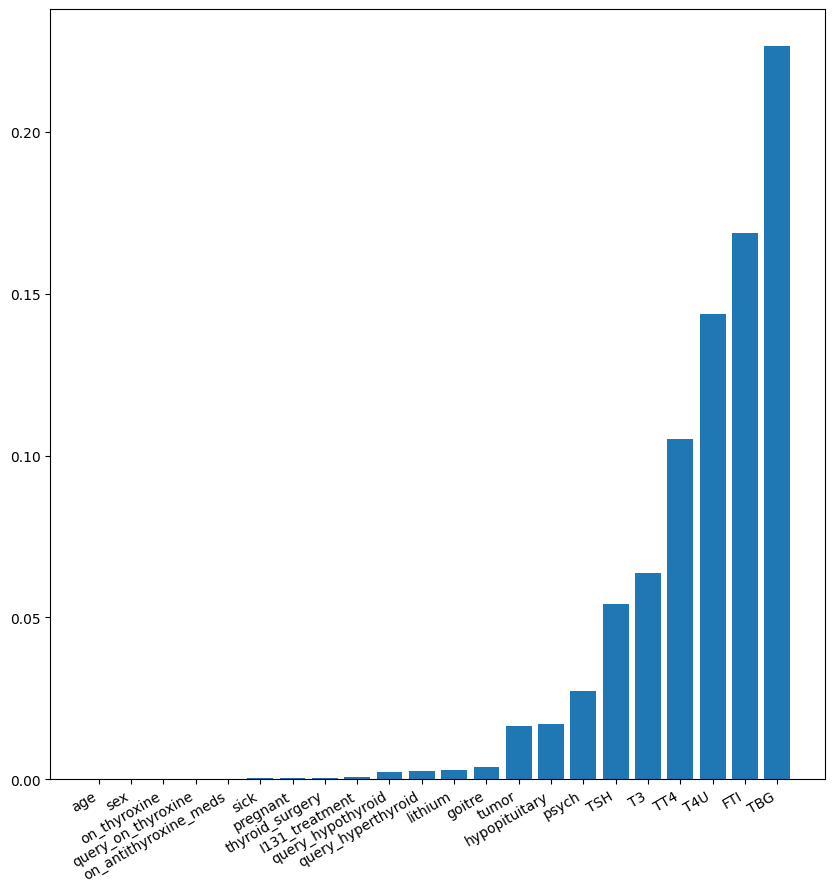

In [38]:

from sklearn.inspection import permutation_importance
results=permutation_importance(rfr,x_bal,y_bal,scoring='accuracy')
feature_importance=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroxine_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG']
importance=results.importances_mean
importance=np.sort(importance)
#summerize feature importance
for i,v in enumerate(importance):
  i=feature_importance[i]
  print('feature: {:<20} Score: {}'. format(i,v))
#plot importance feature
plt.figure(figsize=(10,10))  
plt.bar(x=feature_importance, height=importance)
plt.xticks(rotation=30, ha='right')
plt.show()

In [39]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,36.0
18,63.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,68.000000,0.0,48.0,1.02,47.0,0.0
32,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.050000,1.6,39.0,1.00,39.0,0.0
33,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.050000,0.0,126.0,1.38,91.0,0.0
39,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,9.599999,2.4,136.0,1.48,92.0,0.0


In [40]:
x_bal=x_bal.drop(['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroxine_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium'],axis=1)


In [41]:
x_test_bal=x_test_bal.drop(['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroxine_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium'],axis=1)

In [42]:
x_bal.head()

,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.073367,-0.185723,-0.037741,-0.144603,-0.315458,-1.035358,-1.704935,-2.508707,-1.400881,3.294451
1,-0.073367,-0.185723,-0.037741,-0.144603,-0.090056,0.155233,-0.197223,-0.262591,0.072098,-0.194940
2,-0.073367,-0.185723,-0.037741,-0.144603,-0.278907,-0.471394,-0.227079,0.170395,-0.193521,-0.194940
3,-0.073367,6.169673,-0.037741,-0.144603,-0.284999,0.969848,0.041622,0.495134,-0.133153,-0.194940
4,-0.073367,-0.185723,-0.037741,-0.144603,-0.306321,4.541622,1.459767,-0.127283,1.496783,-0.194940


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   int64  
 1   sex                  2147 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   o

In [44]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,36.0
18,63.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,68.000000,0.0,48.0,1.02,47.0,0.0
32,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.050000,1.6,39.0,1.00,39.0,0.0
33,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.050000,0.0,126.0,1.38,91.0,0.0
39,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,9.599999,2.4,136.0,1.48,92.0,0.0


<Axes: >

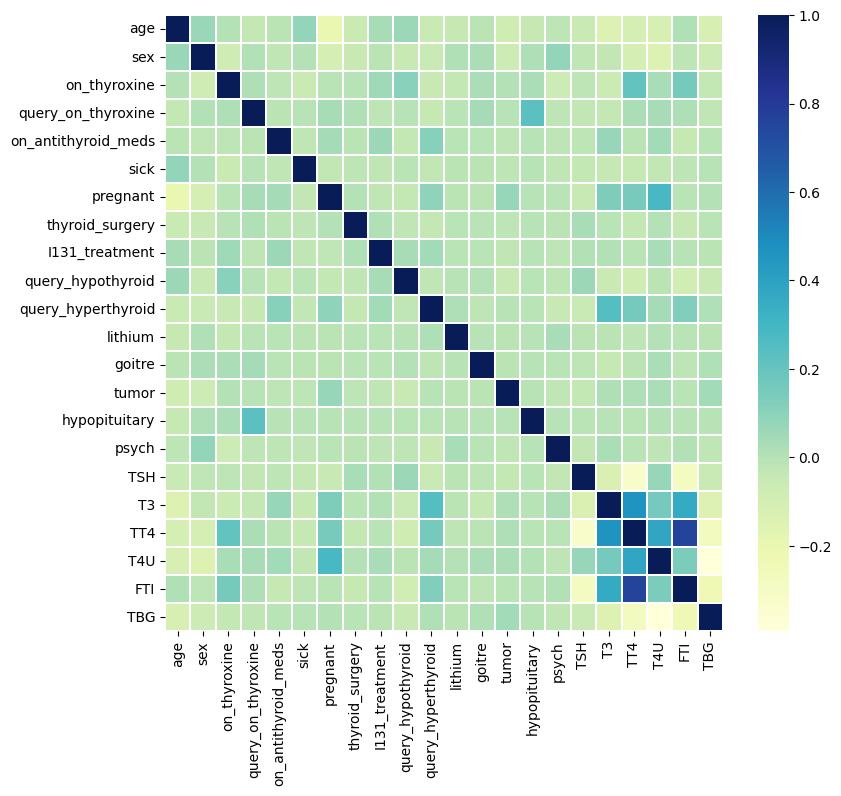

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = x.corr()
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)




In [46]:
from sklearn.ensemble import RandomForestClassifier



# Create and fit the RandomForestClassifier object
rfr1 = RandomForestClassifier()
rfr1.fit(x_bal,y_bal)


# Predict using the trained model
y_pred = rfr1.predict(x_test_bal)


# Define x_test_os using oversampling





<ipython-input-46-85e236604c8d>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr1.fit(x_bal,y_bal)


In [47]:
rfr1 = RandomForestClassifier()
rfr1.fit(x_bal, y_bal)



<ipython-input-47-813284120830>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr1.fit(x_bal, y_bal)


RandomForestClassifier()

In [48]:
y_pred = rfr1.predict(x_test_bal)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test_bal, y_pred))


              precision    recall  f1-score   support

         0.0       0.69      0.07      0.13       122
         1.0       0.81      0.93      0.86       122
         2.0       0.94      0.99      0.96       122
         3.0       0.78      0.84      0.81       122
         4.0       0.45      0.87      0.59       122
         5.0       0.89      0.70      0.78       122
         6.0       0.60      0.53      0.56       122

    accuracy                           0.70       854
   macro avg       0.74      0.70      0.67       854
weighted avg       0.74      0.70      0.67       854



In [50]:
from sklearn.metrics import accuracy_score
train_score = accuracy_score(y_bal, rfr1.predict(x_bal))
train_score

1.0

In [51]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier()
xgb1.fit(x_bal,y_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [52]:
y_pred = xgb1.predict(x_test_bal)

In [53]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.30      0.45       122
         1.0       0.82      0.93      0.87       122
         2.0       0.96      1.00      0.98       122
         3.0       0.77      0.84      0.80       122
         4.0       0.53      0.86      0.66       122
         5.0       0.83      0.70      0.76       122
         6.0       0.59      0.53      0.56       122

    accuracy                           0.74       854
   macro avg       0.77      0.74      0.73       854
weighted avg       0.77      0.74      0.73       854



In [54]:
accuracy_score(y_test_bal,y_pred)

0.7400468384074942

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm = SVC()
svm.fit(x_bal, y_bal)




/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [56]:
y_pred = svm.predict(x_test_bal)


In [57]:
print(classification_report(y_test_bal, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77       122
         1.0       0.78      0.81      0.80       122
         2.0       0.88      0.92      0.90       122
         3.0       0.73      0.70      0.72       122
         4.0       0.73      0.63      0.68       122
         5.0       0.83      0.53      0.65       122
         6.0       0.51      0.62      0.56       122

    accuracy                           0.72       854
   macro avg       0.74      0.72      0.72       854
weighted avg       0.74      0.72      0.72       854



In [58]:
train_score=accuracy_score(y_bal,svm.predict(x_bal))
train_score

0.7209584470730968

In [59]:
model= Sequential()


In [60]:
model.add(Dense(units=128,activation='relu',input_shape=(10,)))

In [61]:
model.add(Dense(units=128,activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units=256,activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units=128,activation='relu',kernel_initializer='random_uniform'))

In [62]:
model.add(Dense(units=1,activation='sigmoid'))

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [66]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [67]:
model.fit(x_bal,y_bal,validation_data=[x_test_bal,y_test_bal],epochs=15)

Epoch 1/15
104/104 [==============================] - 2s 7ms/step - loss: -23082.3750 - accuracy: 0.1429 - val_loss: -184224.8594 - val_accuracy: 0.1429
Epoch 2/15
104/104 [==============================] - 0s 5ms/step - loss: -3218797.0000 - accuracy: 0.1429 - val_loss: -12660903.0000 - val_accuracy: 0.1429
Epoch 3/15
104/104 [==============================] - 0s 4ms/step - loss: -53598692.0000 - accuracy: 0.1429 - val_loss: -140775584.0000 - val_accuracy: 0.1429
Epoch 4/15
104/104 [==============================] - 0s 4ms/step - loss: -349807520.0000 - accuracy: 0.1429 - val_loss: -723085568.0000 - val_accuracy: 0.1429
Epoch 5/15
104/104 [==============================] - 0s 5ms/step - loss: -1371251840.0000 - accuracy: 0.1429 - val_loss: -2427643392.0000 - val_accuracy: 0.1429
Epoch 6/15
104/104 [==============================] - 0s 4ms/step - loss: -3956075008.0000 - accuracy: 0.1429 - val_loss: -6392309248.0000 - val_accuracy: 0.1429
Epoch 7/15
104/104 [===========================

In [68]:
rfr1.predict([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([4.])

In [69]:
svm.predict([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1.])

In [70]:
col= ['goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
da = [[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]]
da1 = pd.DataFrame(data = da, columns=col)
xgb1.predict(da1)

array([4])

In [71]:
model.predict([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])

1/1 [==============================] - 0s 140ms/step


array([[1.]], dtype=float32)

In [72]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77       122
         1.0       0.78      0.81      0.80       122
         2.0       0.88      0.92      0.90       122
         3.0       0.73      0.70      0.72       122
         4.0       0.73      0.63      0.68       122
         5.0       0.83      0.53      0.65       122
         6.0       0.51      0.62      0.56       122

    accuracy                           0.72       854
   macro avg       0.74      0.72      0.72       854
weighted avg       0.74      0.72      0.72       854



In [73]:
train_score = accuracy_score(y_bal,rfr1.predict(x_bal))

In [74]:
train_score

1.0

In [75]:
y_pred=xgb1.predict(x_test_bal)

In [76]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.30      0.45       122
         1.0       0.82      0.93      0.87       122
         2.0       0.96      1.00      0.98       122
         3.0       0.77      0.84      0.80       122
         4.0       0.53      0.86      0.66       122
         5.0       0.83      0.70      0.76       122
         6.0       0.59      0.53      0.56       122

    accuracy                           0.74       854
   macro avg       0.77      0.74      0.73       854
weighted avg       0.77      0.74      0.73       854



In [77]:
train_score = accuracy_score(y_bal, xgb1.predict(x_bal))
train_score

1.0

In [78]:
y_pred = svm.predict(x_test_bal)

In [79]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77       122
         1.0       0.78      0.81      0.80       122
         2.0       0.88      0.92      0.90       122
         3.0       0.73      0.70      0.72       122
         4.0       0.73      0.63      0.68       122
         5.0       0.83      0.53      0.65       122
         6.0       0.51      0.62      0.56       122

    accuracy                           0.72       854
   macro avg       0.74      0.72      0.72       854
weighted avg       0.74      0.72      0.72       854



In [80]:
train_score=accuracy_score(y_bal,svm.predict(x_bal))
train_score

0.7209584470730968

In [81]:
y_pred = model.predict(x_test_bal)

27/27 [==============================] - 0s 2ms/step


In [82]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       122
         1.0       0.14      1.00      0.25       122
         2.0       0.00      0.00      0.00       122
         3.0       0.00      0.00      0.00       122
         4.0       0.00      0.00      0.00       122
         5.0       0.00      0.00      0.00       122
         6.0       0.00      0.00      0.00       122

    accuracy                           0.14       854
   macro avg       0.02      0.14      0.04       854
weighted avg       0.02      0.14      0.04       854



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
accuracy_score(y_test_bal,y_pred)

0.14285714285714285

In [84]:
params = {
    
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
       'kernel': ['rbf','sqrt']
}

In [85]:
from sklearn.model_selection import RandomizedSearchCV
random_svc = RandomizedSearchCV(svm,params, scoring='accuracy',cv=5,n_jobs=-1)

In [86]:
random_svc.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_vali

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'sqrt']},
                   scoring='accuracy')

In [87]:
random_svc.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}

In [88]:
sv1=SVC(kernel= 'rbf', gamma= 0.1, C=100)

In [89]:
sv1.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=0.1)

In [90]:
y_pred= sv1.predict(x_test_bal)

In [91]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.75      0.75       122
         1.0       0.77      0.87      0.82       122
         2.0       0.97      0.91      0.94       122
         3.0       0.73      0.67      0.70       122
         4.0       0.66      0.72      0.69       122
         5.0       0.71      0.70      0.71       122
         6.0       0.57      0.52      0.54       122

    accuracy                           0.74       854
   macro avg       0.74      0.74      0.73       854
weighted avg       0.74      0.74      0.73       854



In [92]:
train_score= accuracy_score(y_bal,sv1.predict(x_bal))
train_score

0.8180163785259327

In [93]:
# saving the model
import pickle
pickle.dump(sv1,open('thyroid_1_model.pkl','wb'))

In [94]:
features = np.array([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])
print(label_encoder.inverse_transform(xgb1.predict(features)))

['hypothyroid conditions']


In [95]:
pickle.dump(label_encoder, open('label_encoder.pkl', 'wb'))


In [96]:
data['target'].unique()

array(['miscellaneous', 'hypothyroid conditions', 'binding protein',
       'replacement therapy', 'general health', 'hyperthyroid conditions',
       'antithyroid treatment'], dtype=object)

In [97]:
y['target'].unique()

array([5., 4., 1., 6., 2., 3., 0.])

In [98]:
import pickle
pickle.dump(sv1,open('throid_1_model.pkl','wb'))